In [1]:
pip install factor_analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41445 sha256=0b9edce04b41ed98ba3b8d6ac049a324f86ee4fb47b010cc48651d1338e314ae
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\00\cf\ea\83feab47e1d682730be5935c52a2647f49adfb393e948d4bf5
Successfully built factor-analyzer
Note: you may need to restart the kernel to use updated packages.


In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer, Rotator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [150]:
df = pd.read_excel('Export_Data.xlsx', index_col=1)
df

,CountryName,Agriculturalrawmaterialsexpor,ArmsexportsSIPRItrendindica,Commercialserviceexportscurr,Communicationscomputeretc,Exportsofgoodsandservices,Exportsofgoodsandservicesa,ExportsofgoodsandservicesB,Exportsofgoodsandservicesc,Foodexportsofmerchandisee,GoodsexportsBoPcurrentUS,Fuelexportsofmerchandisee,Hightechnologyexportsofma,Hightechnologyexportscurrent,TaxesonexportscurrentLCU,Transportservicesofservice,Travelservicesofcommercial,Travelservicesofserviceex
CountryCode,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,17.113304,NaN,6.230657e+08,28.402324,NaN,NaN,1.611540e+09,NaN,65.086420,8.752371e+08,10.469329,NaN,NaN,NaN,24.602029,4.482772,3.793358
ALB,Albania,0.313849,NaN,3.574339e+09,16.058391,31.684671,3.196598,4.784712e+09,4.807222e+09,9.042059,1.163649e+09,1.663178,0.049514,591717.0,NaN,8.443837,61.150507,60.361848
DZA,Algeria,NaN,NaN,NaN,NaN,25.623547,-4.300000,NaN,5.296803e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASM,American Samoa,NaN,NaN,NaN,NaN,68.867925,14.325843,NaN,3.321704e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,Andorra,1.551347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.581574,NaN,0.013955,28.460560,33913480.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PSE,West Bank and Gaza,NaN,NaN,5.608593e+08,36.257881,19.865352,7.878720,2.903485e+09,2.456322e+09,NaN,2.290995e+09,NaN,NaN,NaN,NaN,1.625164,43.720375,40.034937
YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, AFG to ZWE
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CountryName                    217 non-null    object 
 1   Agriculturalrawmaterialsexpor  126 non-null    float64
 2   ArmsexportsSIPRItrendindica    40 non-null     float64
 3   Commercialserviceexportscurr   164 non-null    float64
 4   Communicationscomputeretc      159 non-null    float64
 5   Exportsofgoodsandservices      168 non-null    float64
 6   Exportsofgoodsandservicesa     151 non-null    float64
 7   ExportsofgoodsandservicesB     163 non-null    float64
 8   Exportsofgoodsandservicesc     148 non-null    float64
 9   Foodexportsofmerchandisee      127 non-null    float64
 10  GoodsexportsBoPcurrentUS       164 non-null    float64
 11  Fuelexportsofmerchandisee      122 non-null    float64
 12  Hightechnologyexportsofma      109 non-null    float6

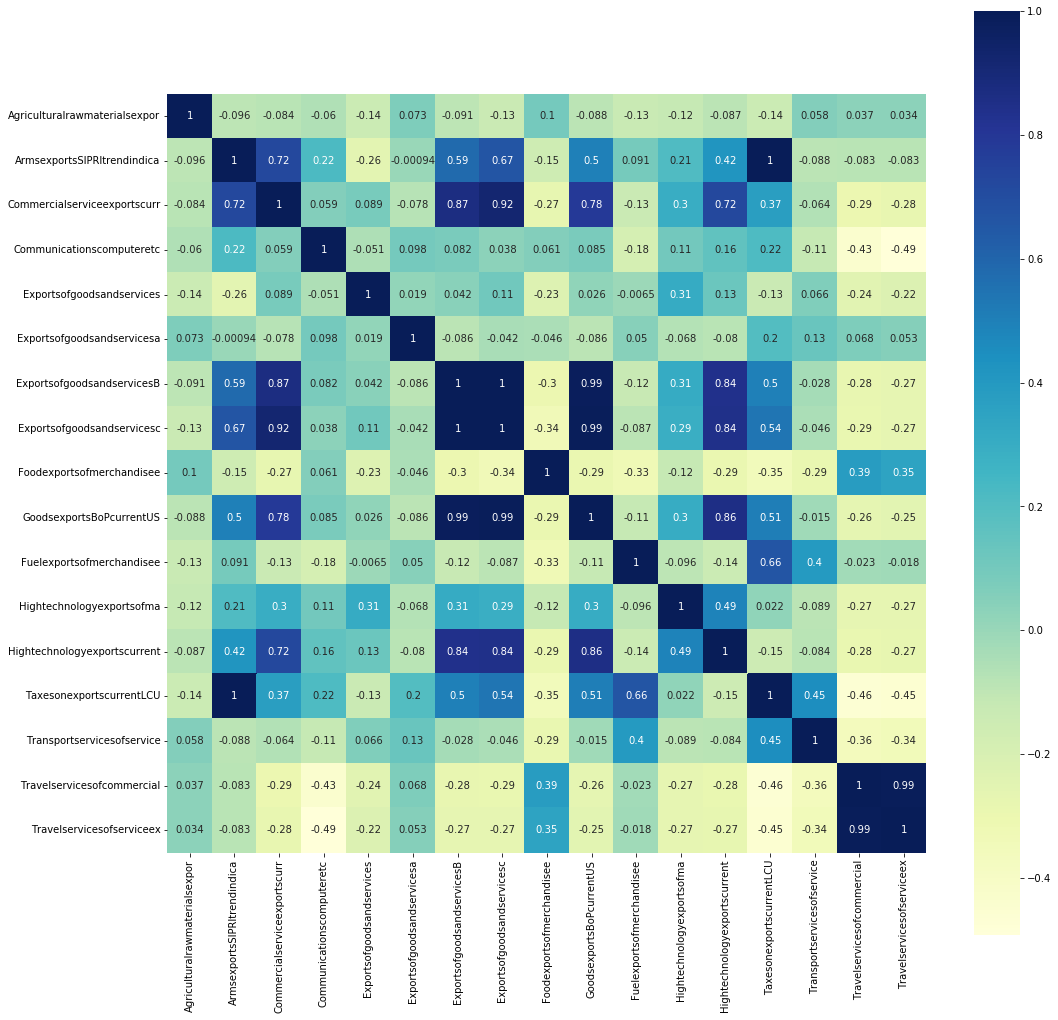

In [152]:
cor = df.corr('pearson')
plt.figure(figsize=(17, 17))
sns.heatmap(cor, square = True, cmap='YlGnBu', annot=True)
plt.show()

In [153]:
df_factors = df[['ArmsexportsSIPRItrendindica', 
                 'Commercialserviceexportscurr', 
                 'Communicationscomputeretc', 
                 'Travelservicesofcommercial', 
                 'Hightechnologyexportsofma', 
                 'Agriculturalrawmaterialsexpor', 
                 'Foodexportsofmerchandisee', 
                 'Transportservicesofservice', 
                 'Fuelexportsofmerchandisee']]
df_factors

,ArmsexportsSIPRItrendindica,Commercialserviceexportscurr,Communicationscomputeretc,Travelservicesofcommercial,Hightechnologyexportsofma,Agriculturalrawmaterialsexpor,Foodexportsofmerchandisee,Transportservicesofservice,Fuelexportsofmerchandisee
CountryCode,,,,,,,,,
AFG,NaN,6.230657e+08,28.402324,4.482772,NaN,17.113304,65.086420,24.602029,10.469329
ALB,NaN,3.574339e+09,16.058391,61.150507,0.049514,0.313849,9.042059,8.443837,1.663178
DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,NaN,NaN,NaN,NaN,28.460560,1.551347,0.581574,NaN,0.013955
...,...,...,...,...,...,...,...,...,...
VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PSE,NaN,5.608593e+08,36.257881,43.720375,NaN,NaN,NaN,1.625164,NaN
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
df_factors = df_factors.fillna(df_factors.median())

## Data factorability analysis

Hypothesis:

- H0: varaibles from the set{'ArmsexportsSIPRItrendindica', 'Commercialserviceexportscurr', 'Communicationscomputeretc', 'Travelservicesofcommercial', 'Hightechnologyexportsofma','Agriculturalrawmaterialsexpor', 'Foodexportsofmerchandisee', 'Transportservicesofservice', 'Fuelexportsofmerchandisee'} are unrelated
- H1: variables from the aforementioned set are somehow related.

p-value: 0.05

The hypothesis is checked using Bartlett's test of sphericity.

In [155]:
calculate_bartlett_sphericity(df_factors)

(374.8685999438757, 5.329968474528235e-58)

#### Conclusion:

H0 is rejected since p-value is less than 0.05, so there are statistically significant relations between variables

Let us perfrom the Kaiser–Meyer–Olkin (KMO) test to determine how suited data is for factor analysis:

In [156]:
_, kmo_model = calculate_kmo(df_factors)
kmo_model

0.47681312510788204

KMO < 0.5, so the factor analysis is unaccepted on this dataset. 

Let us use another function for fillna and replace mean with median:

In [157]:
df_factors = df[['ArmsexportsSIPRItrendindica', 
                 'Commercialserviceexportscurr', 
                 'Communicationscomputeretc', 
                 'Travelservicesofcommercial', 
                 'Hightechnologyexportsofma', 
                 'Agriculturalrawmaterialsexpor', 
                 'Foodexportsofmerchandisee', 
                 'Transportservicesofservice', 
                 'Fuelexportsofmerchandisee']]
df_factors = df_factors.fillna(df_factors.median())
_, kmo_model = calculate_kmo(df_factors)
kmo_model

0.47681312510788204

Now KMO is near 0.5 (specifically with rounding), so a factor analysis can be used on this dataset, however the data is only miserably suited for the factor analysis

#### Verifying on Bartlett's test of sphericity for the new dataset:

In [158]:
calculate_bartlett_sphericity(df_factors)

(374.8685999438757, 5.329968474528235e-58)

#### Conclusion:

H0 is rejected since p-value is less than 0.05, so there are statistically significant relations between variables

## Determining a number of factors

Specifying varimax rotation which produces orthogonal factors:

In [159]:
fa = FactorAnalyzer(n_factors=15, rotation='varimax', method='principal') 
#factor model for 15 factors, which corresponds to the total number of variables
fa.fit(df_factors)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='principal', n_factors=15, rotation='varimax',
               rotation_kwargs={}, svd_method='randomized', use_smc=True)

Getting eigenvalues to capture a number of factors by getting count of eigenvalues > 1

In [160]:
ev, v = fa.get_eigenvalues()
ev[ev > 1]

array([2.14384363, 1.56053651, 1.27295837, 1.07787205])

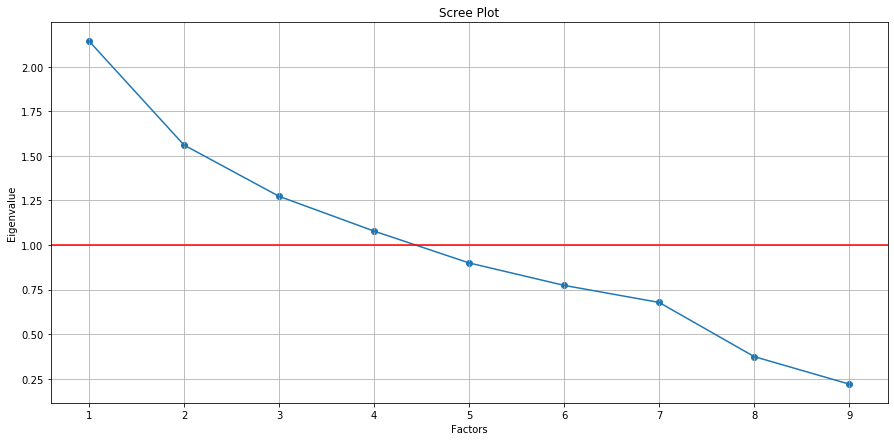

In [161]:
plt.figure(figsize=(15, 7))
plt.scatter(range(1, df_factors.shape[1]+1), ev)
plt.plot(range(1, df_factors.shape[1]+1), ev)
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#### Conclusion:

It is better to take 4 factors since the quantity of eigenvalues > 1 is 4.

### Result factor model

In [162]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax', method='principal') 
#factor model with 3 factors
fa.fit(df_factors)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='principal', n_factors=4, rotation='varimax',
               rotation_kwargs={}, svd_method='randomized', use_smc=True)

## Communalities

To check how well variables fit into the model, the communalities are checked. If communality of a variable < 0.3, it does not fit well into the model.

In [163]:
communalities = pd.DataFrame(data=fa.get_communalities(), 
                       index=df_factors.columns, 
                       columns=['Communalities'])
communalities.sort_values('Communalities')

,Communalities
Hightechnologyexportsofma,0.302876
Foodexportsofmerchandisee,0.481691
Fuelexportsofmerchandisee,0.573422
Transportservicesofservice,0.702140
Communicationscomputeretc,0.718258
Agriculturalrawmaterialsexpor,0.788387
ArmsexportsSIPRItrendindica,0.800983
Travelservicesofcommercial,0.819559
Commercialserviceexportscurr,0.867895


As is seen from the table below, all the variables fit into the model, although the variable 'Hightechnologyexportsofma' (High-technology exports) has a communality which is nearly 0.3 meaning that this variable barely fit well in the model. As for other variables, it is seen that the variance of Transport services, Communications, computer, etc., Agricultural raw materials exports, Arms exports, Travel services and Commercial service exports is highly shared among the variables, so these variables fit very well into the model. Variables Food exports and Fuel exports have medium fitness into the model.

### Cumulative variance of the initial variables explained by the model

In [164]:
factor_variance = pd.DataFrame(data=fa.get_factor_variance()[1:3],
                              index=['Proportional variance', 'Cumulative variance'],
                              columns=['Factor 1', 'Factor 2','Factor 3','Factor 4'])
factor_variance

,Factor 1,Factor 2,Factor 3,Factor 4
Proportional variance,0.20325,0.179701,0.165432,0.124418
Cumulative variance,0.20325,0.382951,0.548383,0.672801


The model with 4 factors describes 67% of variance of the initial variables, which should be sufficient enough for the further analysis of the data. The first factor decribes 20% of variance, the second one 18%, the third one 17% and the fourth one 12%. As is seen, the Factor 4 has the least relative weight in the total variance, while the first 3 factors explain nearly the same amount of the total variance.

## Factor loading matrix

In [165]:
factors = pd.DataFrame(data=fa.loadings_, 
                       index=df_factors.columns, 
                       columns=['Factor_1', 'Factor_2', 'Factor_3', 'Factor_4'])
factors

,Factor_1,Factor_2,Factor_3,Factor_4
ArmsexportsSIPRItrendindica,0.891875,0.042505,-0.018724,0.058170
Commercialserviceexportscurr,0.919030,0.013892,0.133202,-0.073097
Communicationscomputeretc,-0.005000,-0.215156,0.817965,-0.053609
Travelservicesofcommercial,-0.174945,-0.364740,-0.809340,-0.029758
Hightechnologyexportsofma,0.339966,-0.070223,0.290100,-0.313385
Agriculturalrawmaterialsexpor,0.045180,-0.013965,0.006845,0.886625
Foodexportsofmerchandisee,-0.185144,-0.530907,-0.056663,0.402914
Transportservicesofservice,-0.081632,0.783558,0.173038,0.227093
Fuelexportsofmerchandisee,-0.001767,0.731456,-0.171284,-0.095147


According to the factor loading matrix, the most impactful variables which have a signficant influence on the factors are:
- Arms exports
- Commercial service exports
- Communications, computer, etc.
- Travel services
- Agricultural raw materials exports
- Transport services
- Fuel exports.

The medium impact also provides 'Food exports'. A variable decribing high-technology exports has the least impact according to the table as all the values for that row vary in range (-0.32,0.34).

### Factor description and naming

Note. It is not straightforward how to include a name of a negatively correlated variable into a name for a factor, so it was decided to use 'instead of' structure.

Factor 1 is described mainly by Arms exports and Commercial service exports, while all other variables have quite low correlation with this factor (for all other variables |corr|<0.34). Note that Arms exports and Commercial service exports have a very low correlation with other factors. The factor evaluates how big is the country's export of arms and commercial services, so Factor 1 can probably be called 'Arms & Commercial service exports'

Factor 2 is described mainly by Transport services and Fuel exports and also have a medium negative correlation with Food exports. All other variables have quite low correlation with this factor. Again, Transport services and Fuel exports have very low correlation with other factors, but Food exports have a medium positive correlation with Factor 4. The factor shows how big is the country's export of transport services and fuel and how low is the country's export of food. The name of the Factor 1 can be 'Fuel & Transport services export instead of Food export'.

Factor 3 is described mainly by Communications, computer, etc. (positive corr) and Travel services (negative corr). All other variables have quite low correlation with this factor. Both these variables have a very low correlation with other factors. The factor estimates how big is the export of communications, computers and how low is the export of travel services. So, the factor can be called 'Communications and computers export instead of Travel services'.

Factor 4 is described mainly by Agricultural raw materials exports and slightly by Food exports (corr only 40%). All other variables have quite low correlation with this factor. The factor shows how big is the export of agriculture materials and food. Therefore, the factor can be called 'Agriculture materials and Food exports'

## Saving variables in the original dataframe

In [166]:
transformed = pd.DataFrame(data=fa.transform(df_factors),
                           index=df_factors.index,
                           columns=['Arms&CommercialServiceExports','Fuel&TransportServicesInsteadOfFoodExport','CommComputersInsteadOfTravelServices','Agriculture&FoodExport'])
transformed

,Arms&CommercialServiceExports,Fuel&TransportServicesInsteadOfFoodExport,CommComputersInsteadOfTravelServices,Agriculture&FoodExport
CountryCode,,,,
AFG,-0.404073,-0.386012,1.977114,2.730153
ALB,-0.347820,-0.550496,-0.338606,-0.426472
DZA,-0.204687,-0.079036,-0.148640,-0.234016
ASM,-0.204687,-0.079036,-0.148640,-0.234016
AND,0.174637,-0.138507,0.247935,-1.026484
...,...,...,...,...
VIR,-0.204687,-0.079036,-0.148640,-0.234016
PSE,-0.401542,-1.082985,1.201434,-0.575557
YEM,-0.204687,-0.079036,-0.148640,-0.234016


In [167]:
df['Arms&CommercialServiceExports'] = transformed['Arms&CommercialServiceExports'].values
df['Fuel&TransportServicesInsteadOfFoodExport'] = transformed['Fuel&TransportServicesInsteadOfFoodExport'].values
df['CommComputersInsteadOfTravelServices'] = transformed['CommComputersInsteadOfTravelServices'].values
df['Agriculture&FoodExport'] = transformed['Agriculture&FoodExport'].values
df

,CountryName,Agriculturalrawmaterialsexpor,ArmsexportsSIPRItrendindica,Commercialserviceexportscurr,Communicationscomputeretc,Exportsofgoodsandservices,Exportsofgoodsandservicesa,ExportsofgoodsandservicesB,Exportsofgoodsandservicesc,Foodexportsofmerchandisee,...,Hightechnologyexportsofma,Hightechnologyexportscurrent,TaxesonexportscurrentLCU,Transportservicesofservice,Travelservicesofcommercial,Travelservicesofserviceex,Arms&CommercialServiceExports,Fuel&TransportServicesInsteadOfFoodExport,CommComputersInsteadOfTravelServices,Agriculture&FoodExport
CountryCode,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,17.113304,NaN,6.230657e+08,28.402324,NaN,NaN,1.611540e+09,NaN,65.086420,...,NaN,NaN,NaN,24.602029,4.482772,3.793358,-0.404073,-0.386012,1.977114,2.730153
ALB,Albania,0.313849,NaN,3.574339e+09,16.058391,31.684671,3.196598,4.784712e+09,4.807222e+09,9.042059,...,0.049514,591717.0,NaN,8.443837,61.150507,60.361848,-0.347820,-0.550496,-0.338606,-0.426472
DZA,Algeria,NaN,NaN,NaN,NaN,25.623547,-4.300000,NaN,5.296803e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.204687,-0.079036,-0.148640,-0.234016
ASM,American Samoa,NaN,NaN,NaN,NaN,68.867925,14.325843,NaN,3.321704e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.204687,-0.079036,-0.148640,-0.234016
AND,Andorra,1.551347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.581574,...,28.460560,33913480.0,NaN,NaN,NaN,NaN,0.174637,-0.138507,0.247935,-1.026484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.204687,-0.079036,-0.148640,-0.234016
PSE,West Bank and Gaza,NaN,NaN,5.608593e+08,36.257881,19.865352,7.878720,2.903485e+09,2.456322e+09,NaN,...,NaN,NaN,NaN,1.625164,43.720375,40.034937,-0.401542,-1.082985,1.201434,-0.575557
YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.204687,-0.079036,-0.148640,-0.234016


# Performing another Factor analysis

Using randomizer, we take random 10 columns, which have KMO > 0.6 (maybe multiple executions would be needed to gain the appropriate result)

In [168]:
df = pd.read_excel('Export_Data.xlsx', index_col=1)
df = df.drop('CountryName', 1)

<ipython-input-168-ddaad5ace0f0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('CountryName', 1)


In [194]:
sample = df.sample(10, axis=1)
sample=sample.fillna(sample.median())
sample
_, kmo_model = calculate_kmo(sample)

print(sample.columns.tolist(), "\n", kmo_model)
# Unfortunately, I have rerunned the cell, and new combination has been generated. 
#The previous run (on which all the following is based) returned ['Exportsofgoodsandservicesc', 'Hightechnologyexportsofma', 'Hightechnologyexportscurrent', 'Communicationscomputeretc', 'Fuelexportsofmerchandisee', 'Exportsofgoodsandservices', 'Transportservicesofservice', 'ExportsofgoodsandservicesB', 'Travelservicesofserviceex', 'Foodexportsofmerchandisee'],
#the KMO was 0.62

['ArmsexportsSIPRItrendindica', 'ExportsofgoodsandservicesB', 'Foodexportsofmerchandisee', 'Hightechnologyexportscurrent', 'GoodsexportsBoPcurrentUS', 'Agriculturalrawmaterialsexpor', 'Hightechnologyexportsofma', 'Exportsofgoodsandservicesa', 'Exportsofgoodsandservices', 'Commercialserviceexportscurr'] 
 0.6236923457928301


As the result is obtained, we take the following variables (according to the run described in comments to the previous cell):
- Exports of goods and services (constant 2010 US dollarc)
- High-technology exports (% of manufactured exports)
- High-technology exports (current US dollars) 
- Communications, computer, etc. (% of service exports, BoP)
- Fuel exports (% of merchandise exports)
- Exports of goods and services (% of GDP)
- Transport services (% of service exports, BoP)
- Exports of goods and services (BoP, current US dollars)
- Travel services (% of service exports, BoP)
- Food exports (% of merchandise exports)

In [191]:
df_factors = df[['Exportsofgoodsandservicesc', 'Hightechnologyexportsofma', 'Hightechnologyexportscurrent', 'Communicationscomputeretc', 'Fuelexportsofmerchandisee', 'Exportsofgoodsandservices', 'Transportservicesofservice', 'ExportsofgoodsandservicesB', 'Travelservicesofserviceex', 'Foodexportsofmerchandisee']]
df_factors = df_factors.fillna(df_factors.median())
df_factors

,Exportsofgoodsandservicesc,Hightechnologyexportsofma,Hightechnologyexportscurrent,Communicationscomputeretc,Fuelexportsofmerchandisee,Exportsofgoodsandservices,Transportservicesofservice,ExportsofgoodsandservicesB,Travelservicesofserviceex,Foodexportsofmerchandisee
CountryCode,,,,,,,,,,
AFG,1.990745e+10,7.790672,380368407.0,28.402324,10.469329,37.705143,24.602029,1.611540e+09,3.793358,65.086420
ALB,4.807222e+09,0.049514,591717.0,16.058391,1.663178,31.684671,8.443837,4.784712e+09,60.361848,9.042059
DZA,5.296803e+10,7.790672,380368407.0,7.972149,4.642974,25.623547,16.122008,1.822627e+10,40.731757,15.253620
ASM,3.321704e+08,7.790672,380368407.0,7.972149,4.642974,68.867925,16.122008,1.822627e+10,40.731757,15.253620
AND,1.990745e+10,28.460560,33913480.0,7.972149,0.013955,37.705143,16.122008,1.822627e+10,40.731757,0.581574
...,...,...,...,...,...,...,...,...,...,...
VIR,1.990745e+10,7.790672,380368407.0,7.972149,4.642974,37.705143,16.122008,1.822627e+10,40.731757,15.253620
PSE,2.456322e+09,7.790672,380368407.0,36.257881,4.642974,19.865352,1.625164,2.903485e+09,40.034937,15.253620
YEM,1.990745e+10,7.790672,380368407.0,7.972149,4.642974,37.705143,16.122008,1.822627e+10,40.731757,15.253620


## Data factorability analysis
Although KMO > 0.6, we could perform Bartlett's test of sphericity

Hypothesis:

- H0: varaibles from the set{'Exportsofgoodsandservicesc', 'Hightechnologyexportsofma', 'Hightechnologyexportscurrent', 'Communicationscomputeretc', 'Fuelexportsofmerchandisee', 'Exportsofgoodsandservices', 'Transportservicesofservice', 'ExportsofgoodsandservicesB', 'Travelservicesofserviceex', 'Foodexportsofmerchandisee'} are unrelated
- H1: variables from the aforementioned set are somehow related.

p-value: 0.05

The hypothesis is checked using Bartlett's test of sphericity.

In [195]:
calculate_bartlett_sphericity(df_factors)

(813.9658998760668, 1.0042917896125484e-141)

#### Conclusion:

H0 is rejected since p-value is less than 0.05, so there are statistically significant relations between variables

In [196]:
_, kmo_model = calculate_kmo(df_factors)
kmo_model

0.6270137043521722

Since KMO > 0.6, the data is mediocre suited for the factor analysis.

## Determining a number of factors

Specifying varimax rotation which produces orthogonal factors:

In [197]:
fa = FactorAnalyzer(n_factors=15, rotation='varimax', method='principal') 
#factor model for 15 factors, which corresponds to the total number of variables
fa.fit(df_factors)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='principal', n_factors=15, rotation='varimax',
               rotation_kwargs={}, svd_method='randomized', use_smc=True)

Getting eigenvalues to capture a number of factors by getting count of eigenvalues > 1:

In [198]:
ev, v = fa.get_eigenvalues()
ev[ev > 1]

array([3.10634489, 1.61354586, 1.33493383, 1.08227417])

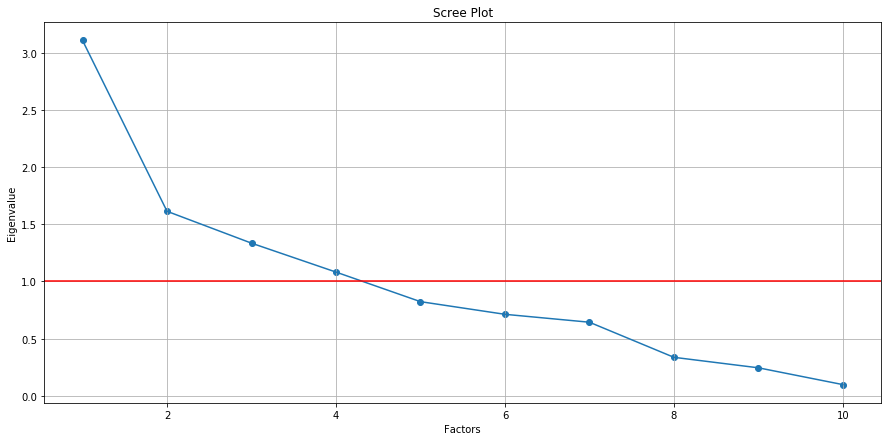

In [199]:
plt.figure(figsize=(15, 7))
plt.scatter(range(1, df_factors.shape[1]+1), ev)
plt.plot(range(1, df_factors.shape[1]+1), ev)
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#### Conclusion:

It is better to take 4 factors since the quantity of eigenvalues > 1 is 4.

### Result factor model

In [200]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax', method='principal') 
#factor model with 3 factors
fa.fit(df_factors)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='principal', n_factors=4, rotation='varimax',
               rotation_kwargs={}, svd_method='randomized', use_smc=True)

## Communalities

To check how well variables fit into the model, the communalities are checked. If communality of a variable < 0.3, it does not fit well into the model.

In [201]:
communalities = pd.DataFrame(data=fa.get_communalities(), 
                       index=df_factors.columns, 
                       columns=['Communalities'])
communalities.sort_values('Communalities')

,Communalities
Foodexportsofmerchandisee,0.395454
Fuelexportsofmerchandisee,0.570227
Hightechnologyexportsofma,0.581504
Transportservicesofservice,0.613976
Exportsofgoodsandservices,0.770573
Communicationscomputeretc,0.810264
ExportsofgoodsandservicesB,0.810858
Travelservicesofserviceex,0.824058
Hightechnologyexportscurrent,0.858914
Exportsofgoodsandservicesc,0.901271


As is seen from the table below, all the variables fit into the model. A variable 'Food exports (% of merchandise exports)' has quite low communality but its value is still enough to count this variable as moderatly suitable for the model. As for other variables, all of them have communality > 0.55 meaning that all of them fit well into the model. Exports of goods and services (constant 2010 US dollarc) seem to be a variable which is described by the model better than any other variables.

### Cumulative variance of the initial variables explained by the model

In [202]:
factor_variance = pd.DataFrame(data=fa.get_factor_variance()[1:3],
                              index=['Proportional variance', 'Cumulative variance'],
                              columns=['Factor 1', 'Factor 2','Factor 3','Factor 4'])
factor_variance

,Factor 1,Factor 2,Factor 3,Factor 4
Proportional variance,0.274449,0.161452,0.148923,0.128886
Cumulative variance,0.274449,0.435901,0.584824,0.713710


According to the table above, the given model describes variance of the initial variables than the previously presented model, since cumulative variance of all the factors is 0.71. The first factor describes 27.5% of total variance, the second one 16%, the third one 15% and the fourth one 13%. The difference in the described variance is more significant than in the previous example, since the Factor 1 describes far more variance than all other factors.

## Factor loading matrix

In [203]:
factors = pd.DataFrame(data=fa.loadings_, 
                       index=df_factors.columns, 
                       columns=['Factor_1', 'Factor_2', 'Factor_3', 'Factor_4'])
factors

,Factor_1,Factor_2,Factor_3,Factor_4
Exportsofgoodsandservicesc,0.941469,0.068301,0.066287,0.076478
Hightechnologyexportsofma,0.388842,-0.109478,0.090457,0.640420
Hightechnologyexportscurrent,0.893210,-0.010764,0.085263,0.231744
Communicationscomputeretc,0.057696,-0.197538,0.873245,-0.073188
Fuelexportsofmerchandisee,-0.031262,0.741206,-0.130572,-0.053054
Exportsofgoodsandservices,-0.033426,0.128537,0.003115,0.867712
Transportservicesofservice,-0.087033,0.759367,0.172450,0.004891
ExportsofgoodsandservicesB,0.893305,0.060157,0.094636,-0.017032
Travelservicesofserviceex,-0.169707,-0.321348,-0.806885,-0.202310
Foodexportsofmerchandisee,-0.263270,-0.556151,-0.002573,-0.129737


According to the factor loading matrix, the most impactful variables which have a signficant influence on the factors are:
- Exports of goods and services (constant 2010 US dollarc)
- High-technology exports (% of manufactured exports)
- High-technology exports (current US dollars) 
- Communications, computer, etc. (% of service exports, BoP)
- Fuel exports (% of merchandise exports)
- Exports of goods and services (% of GDP)
- Transport services (% of service exports, BoP)
- Exports of goods and services (BoP, current US dollars)
- Travel services (% of service exports, BoP).

Food export has a moderate influence

### Factor description and naming

The factor 1 is mainly described by Exports of goods and services (constant 2010 US dollarc), High-technology exports (current US dollars), Exports of goods and services variables (BoP, current US dollars). All of these variables have very low correlations with other factors. The factor shows how big is export of goods and services and export of high-technology in US dollars; thus, the factor may be named as 'Goods, services and high-technology export based on their US-dollar value'.

The factor 2 is mainly described by Fuel exports and Transport services and has a moderate negative correlation with Food export (as in the previous example, interestingly). All of these variables have very low correlations with other factors. The factor shows how big is fuel and transport export of the country and how low is the food export. So, the factor can be called 'Fuel & Transport export instead of Food export'.

The factor 3 is mainly described by Communications, computer, etc. (positive corr) and Travel services (negative corr) - again, as in the previous example. All of these variables have quite low correlations with other factors. The factor shows how big is communication, computer export and how low is travel services export. The factor can be called as 'Communications, computer export instead of Travel services export'.

The factor 4 is mainly described by High-technology exports (%) and Exports of goods and services (%), which have relatively low correlations with other factors. The factor shows how big is high-technology export as well as export of goods and services in terms of their % of GDP/manufactured exports. The factor can be called as 'Goods, services and high-technology export based on their share'

## Saving variables

In [204]:
transformed = pd.DataFrame(data=fa.transform(df_factors),
                           index=df_factors.index,
                           columns=['GoodsServices&HighTechExportBasedOnUsDollar','Fuel&TransportExportInsteadOfFoodExport','CommComputerExportInsteadOfTravelServices','GoodsServices&HighTechExportBasedOnTheirShare'])
transformed

,GoodsServices&HighTechExportBasedOnUsDollar,Fuel&TransportExportInsteadOfFoodExport,CommComputerExportInsteadOfTravelServices,GoodsServices&HighTechExportBasedOnTheirShare
CountryCode,,,,
AFG,-0.687475,-0.513660,2.111725,-0.299445
ALB,-0.228226,-0.476023,-0.184009,-0.793186
DZA,-0.139665,-0.085245,-0.093842,-0.437482
ASM,-0.451742,-0.048913,-0.161938,0.737642
AND,-0.071404,-0.219004,-0.139638,1.110368
...,...,...,...,...
VIR,-0.251814,-0.076342,-0.109284,-0.102932
PSE,-0.236979,-1.012096,1.400815,-0.794889
YEM,-0.251814,-0.076342,-0.109284,-0.102932
